In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from keras import layers
from keras import models
from keras.models import Sequential, load_model, Model
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping
import tensorflow as tf
import visualkeras
from keras.applications import MobileNetV2


# Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls drive/MyDrive

 angielski				     'Frameworki do analizy inteligentnych kontraktów.gdoc'
'Arkusz kalkulacyjny bez nazwy (1).gsheet'    horses_human-my.h5
'Arkusz kalkulacyjny bez nazwy (2).gsheet'   'How to get started with Drive.pdf'
'Arkusz kalkulacyjny bez nazwy (3).gsheet'   'it have to be persian cat .gdoc'
'Arkusz kalkulacyjny bez nazwy (4).gsheet'   ' jakies sieci.gdoc'
'Arkusz kalkulacyjny bez nazwy.gsheet'	     'kasy samoobslugowe.gdoc'
'Arkusz kalkulacyjny bez tytułu (1).gsheet'  'Lista pytan softnatus.gdoc'
'Arkusz kalkulacyjny bez tytułu (2).gsheet'   nauka_agh
'Arkusz kalkulacyjny bez tytułu (3).gsheet'  'o ela ela.gdoc'
'Arkusz kalkulacyjny bez tytułu (4).gsheet'   php
'Arkusz kalkulacyjny bez tytułu (5).gsheet'   pi_egzamin.gsheet
'Arkusz kalkulacyjny bez tytułu (6).gsheet'   PRACA_INZ_RECORD_TRUE.mov
'Arkusz kalkulacyjny bez tytułu (7).gsheet'  'Praca Magisterska - wstepny plan apliacji.gdoc'
'Arkusz kalkulacyjny bez tytułu.gsheet'      'Prezka archeo.gdoc'
'arkusz projektowe.gsheet'

In [ ]:
! unzip drive/MyDrive/sign_data.zip && mv drive/MyDrive/sign_data .

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  inflating: train/5/00005_00054_00001.png  
  in

In [ ]:
data = []
labels = []

directory = './train'

for i in range(43):
    img_path = os.path.join(directory, str(i))
    for img in os.listdir(img_path):
        im = Image.open(directory + '/' + str(i) + '/' + img)
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
len(data)
len(labels)

<ipython-input-2-7c9e5269430a>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


39209

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

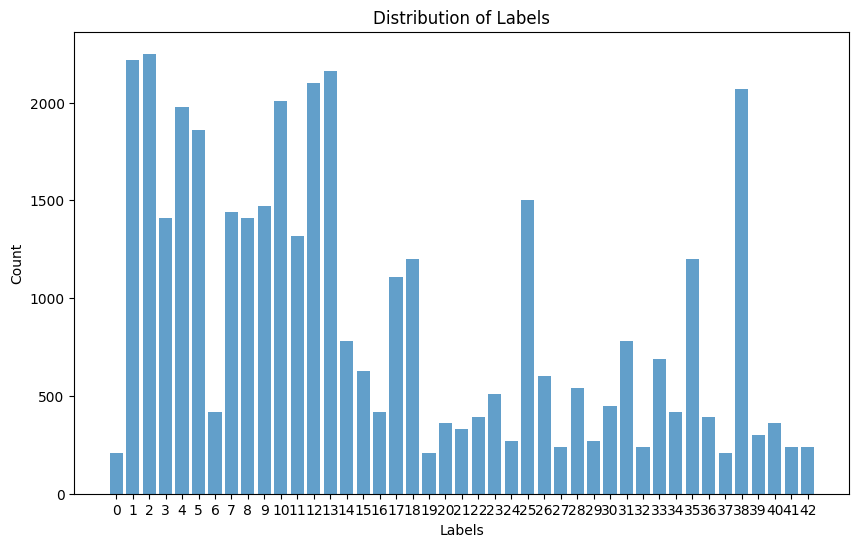

In [ ]:
unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique_labels, label_counts, align='center', alpha=0.7)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(unique_labels)
plt.show()


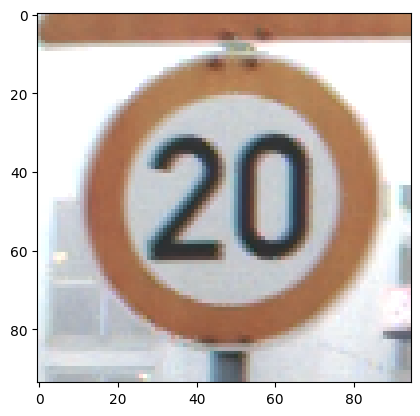

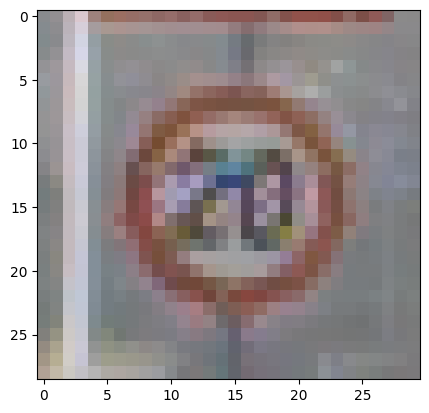

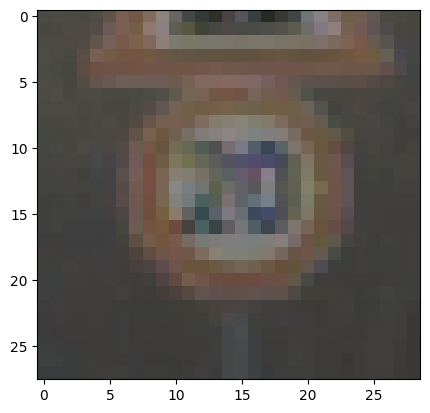

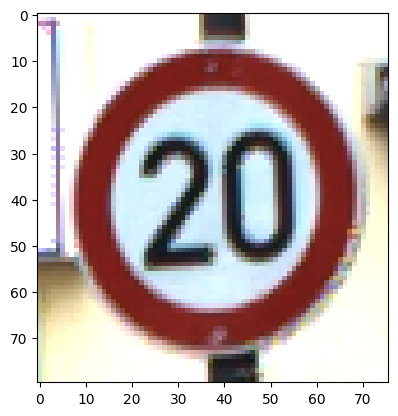

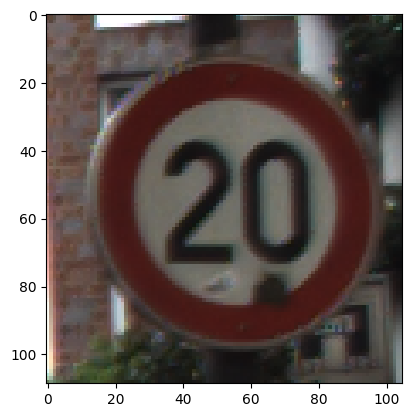

In [ ]:
for i in range(5):
    plt.imshow(data[i])
    plt.show()

In [ ]:
def plot_width_distribution(width):
    plt.hist(width, bins=50)
    plt.xlabel("Image width")
    plt.ylabel("Count")
    plt.title("Image width distribution")
    plt.show()

In [ ]:
def plot_height_distribution(height):
    plt.hist(height, bins=50)
    plt.xlabel("Image width")
    plt.ylabel("Count")
    plt.title("Image width distribution")
    plt.show()

In [ ]:
width = []
height = []

for img in data:
    width.append(img.shape[0])
    height.append(img.shape[1])

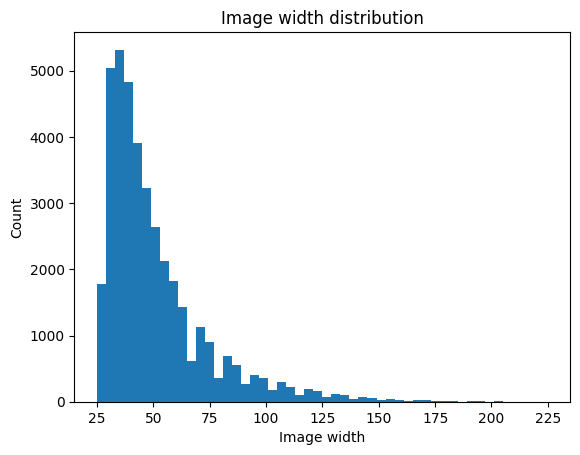

In [ ]:
plot_width_distribution(width)

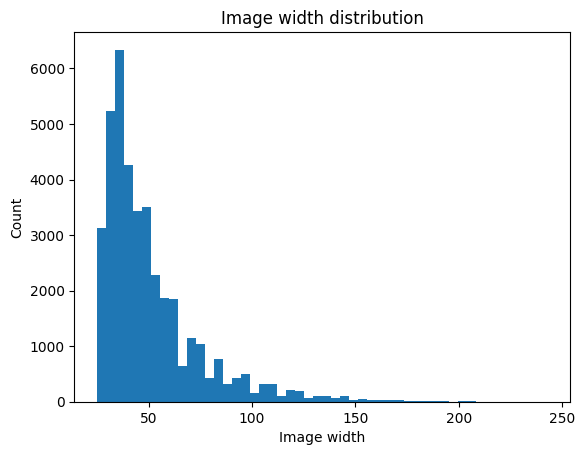

In [ ]:
plot_height_distribution(height)

In [ ]:
median_height = int(np.median(height))
median_width = int(np.median(width))
print("Media width: " , median_width)
print("Media height: ", median_height)
median_height = 32
median_width = 32

Media width:  43
Media height:  43


In [ ]:
def prepare_dataset(X, y, batch_size=32, resize=None, test=None):
    if resize is not None:
        X = [ resize(img).numpy() for img in X ]

    ds = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    if test is None:
        ds = ds.shuffle(len(X))

    ds = ds.batch(batch_size)

    return ds

In [ ]:
resizing = models.Sequential([
    layers.Resizing(median_height, median_width),
    layers.Rescaling(1./255)
])

In [ ]:
X_data, X_test, y_data, y_test = train_test_split(data, labels, test_size=0.1, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=7)
len(X_train), len(y_train), len(X_val), len(y_val), len(X_test), len(y_test)

(28230, 28230, 7058, 7058, 3921, 3921)

In [ ]:
ds_train = prepare_dataset(X_train, y_train, resize=resizing)
ds_train.element_spec

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [ ]:
ds_test = prepare_dataset(X_test, y_test, resize=resizing, test=True)
ds_test.element_spec

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [ ]:
ds_val = prepare_dataset(X_val, y_val, resize=resizing)
ds_val.element_spec

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [ ]:
def plot_accuracy_and_loss_model(history):
    plt.figure(figsize=(15,8))
    plt.title("Accuracy")
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.legend()
    plt.show()

    plt.figure(figsize=(15,8))
    plt.title("Loss")
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

In [ ]:
def show_confusion_matrix(matrix, labels=None):
    num_classes = matrix.shape[0]
    if labels is None:
      labels = [str(i) for i in range(num_classes)]
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels[0:num_classes],
                yticklabels=labels[0:num_classes],
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    # hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def compute_and_show_confusion_matrix(validations, predictions, labels=None):
    matrix = metrics.confusion_matrix(validations, predictions)
    show_confusion_matrix(matrix, labels)

In [ ]:
def show_classification_report_and_confusion_matrix(model, ds_test):
    probs = model.predict(ds_test)
    print(f'{probs.shape}')
    y_pred = np.argmax(probs,axis=1)

    print(classification_report(y_test, y_pred))
    compute_and_show_confusion_matrix(y_test, y_pred)

In [ ]:
def plot_2_misclassified_objects(y_pred, y_test, X_test):
    misclassified_mask = (y_pred != y_test)
    misclassified_indices = np.where(misclassified_mask)[0]

    first_index =  misclassified_indices[0]
    second_index = misclassified_indices[1]

    plt.imshow(X_test[first_index])
    plt.title("True label: " + classes[y_test[first_index]] + ", Predicted label: " + classes[y_pred[first_index]])
    plt.show()

    plt.imshow(X_test[second_index])
    plt.title("True label: " + classes[y_test[second_index]] + ", Predicted label: " + classes[y_pred[second_index]])
    plt.show()

In [ ]:
def build_model(hp):
    cnn_model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(median_height, median_width, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.1),

        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(median_height, median_width, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.1),


        layers.Flatten(),

        layers.Dense(512, activation='relu'),
        layers.Dense(43, activation='softmax')
    ])

    cnn_model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return cnn_model

In [ ]:
from keras_tuner.tuners import BayesianOptimization

tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=5,
    directory='bayesian_optimization',
    project_name='traffic_sign_classification'
)

Using TensorFlow backend
Reloading Tuner from bayesian_optimization/traffic_sign_classification/tuner0.json


In [ ]:
tuner.search(ds_train, epochs=15, validation_data=ds_val)

In [ ]:
best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print("Best Hyperparameters:")
print(best_hps)

# Build the model with the best hyperparameters
best_model = tuner.oracle.get_best_trials(num_trials=1)[0].trial_id

# Compile and train the best model
cnn_model = build_model(best_hps)
cnn_model.summary()

Best Hyperparameters:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (No

In [ ]:
epochs = 30
hist_cnn = cnn_model.fit(ds_train, epochs=epochs, validation_data=ds_val)

Epoch 1/30
883/883 [==============================] - 10s 6ms/step - loss: 1.0059 - accuracy: 0.7219 - val_loss: 0.2620 - val_accuracy: 0.9338
Epoch 2/30
883/883 [==============================] - 5s 5ms/step - loss: 0.2120 - accuracy: 0.9401 - val_loss: 0.1357 - val_accuracy: 0.9632
Epoch 3/30
883/883 [==============================] - 4s 5ms/step - loss: 0.1193 - accuracy: 0.9670 - val_loss: 0.0897 - val_accuracy: 0.9779
Epoch 4/30
883/883 [==============================] - 5s 6ms/step - loss: 0.0861 - accuracy: 0.9744 - val_loss: 0.0778 - val_accuracy: 0.9831
Epoch 5/30
883/883 [==============================] - 5s 5ms/step - loss: 0.0641 - accuracy: 0.9807 - val_loss: 0.0732 - val_accuracy: 0.9819
Epoch 6/30
883/883 [==============================] - 4s 5ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0562 - val_accuracy: 0.9880
Epoch 7/30
883/883 [==============================] - 5s 6ms/step - loss: 0.0441 - accuracy: 0.9859 - val_loss: 0.0550 - val_accuracy: 0.9872
Epoch

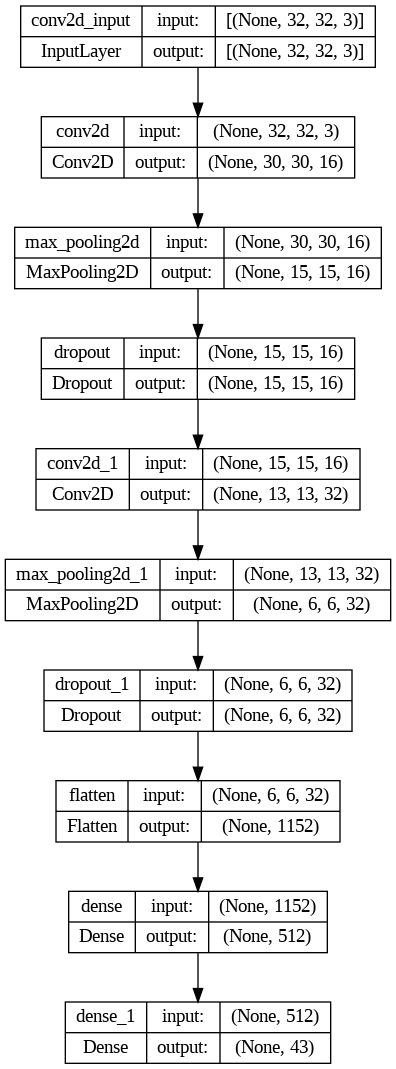

In [ ]:
plot_model(cnn_model, show_shapes=True, show_layer_names=True)

In [ ]:
visualkeras.layered_view(cnn_model, lengend=True).show()

TypeError: ignored

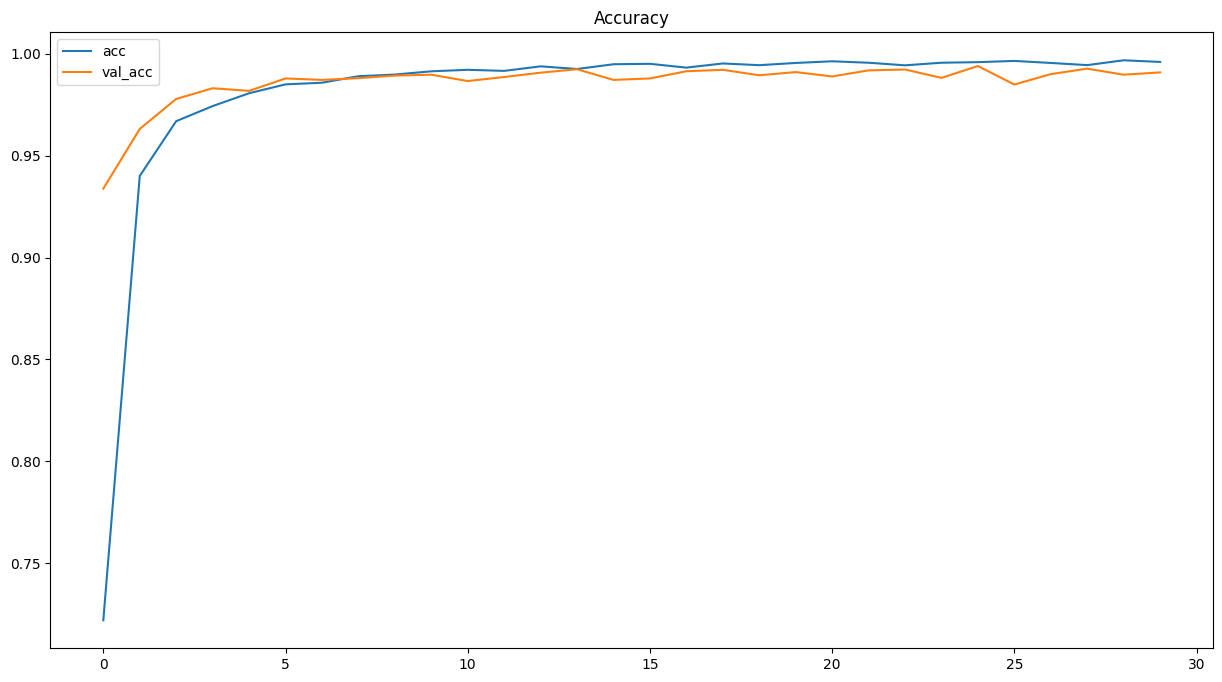

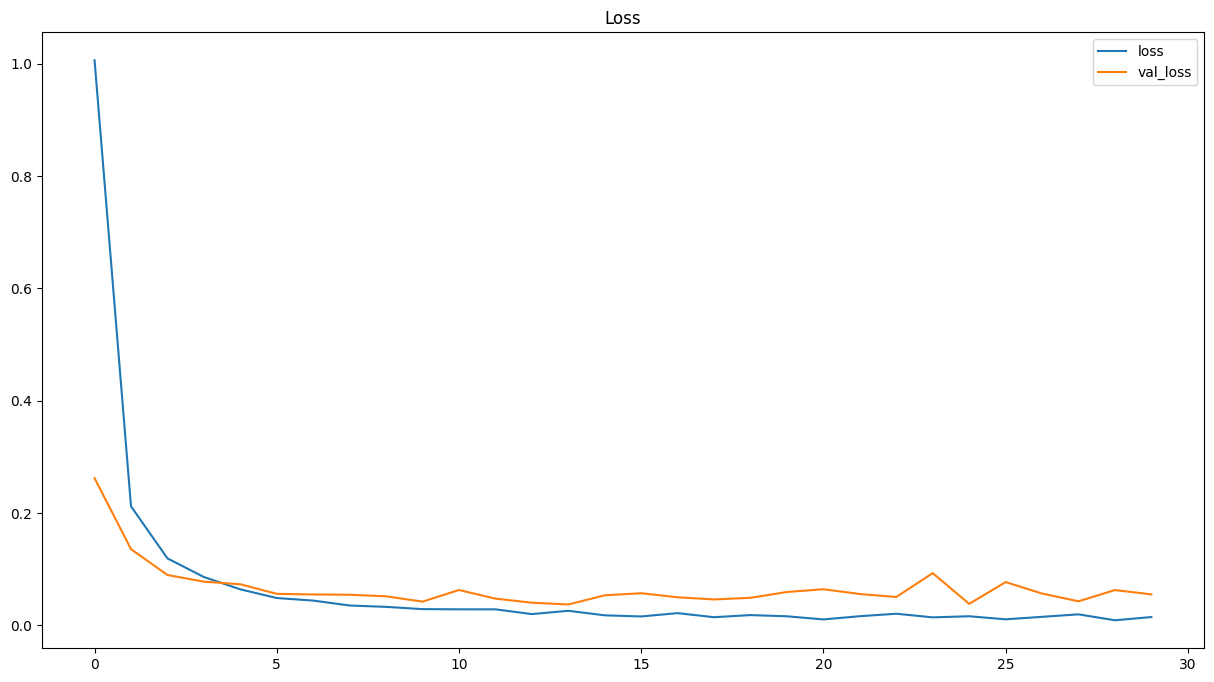

In [ ]:
plot_accuracy_and_loss_model(hist_cnn)

In [ ]:
loss, acc = cnn_model.evaluate(ds_test)
print("Accuracy: ",acc)

123/123 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9895
Accuracy:  0.9895434975624084


In [ ]:
probs = cnn_model.predict(ds_test)

print(f'{probs.shape}')
y_pred = np.argmax(probs,axis=1)

123/123 [==============================] - 0s 2ms/step
(3921, 43)


In [ ]:
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.97      1.00      0.98       221
           2       0.99      1.00      0.99       225
           3       0.99      1.00      1.00       141
           4       0.99      0.98      0.98       190
           5       0.97      0.95      0.96       197
           6       1.00      1.00      1.00        39
           7       1.00      0.98      0.99       141
           8       0.99      0.97      0.98       148
           9       1.00      0.99      1.00       158
          10       0.99      1.00      1.00       202
          11       1.00      0.99      1.00       127
          12       1.00      1.00      1.00       193
          13       0.99      1.00      0.99       213
          14       1.00      1.00      1.00        63
          15       1.00      1.00      1.00        55
          16       1.00      1.00      1.00        35
          17       1.00    

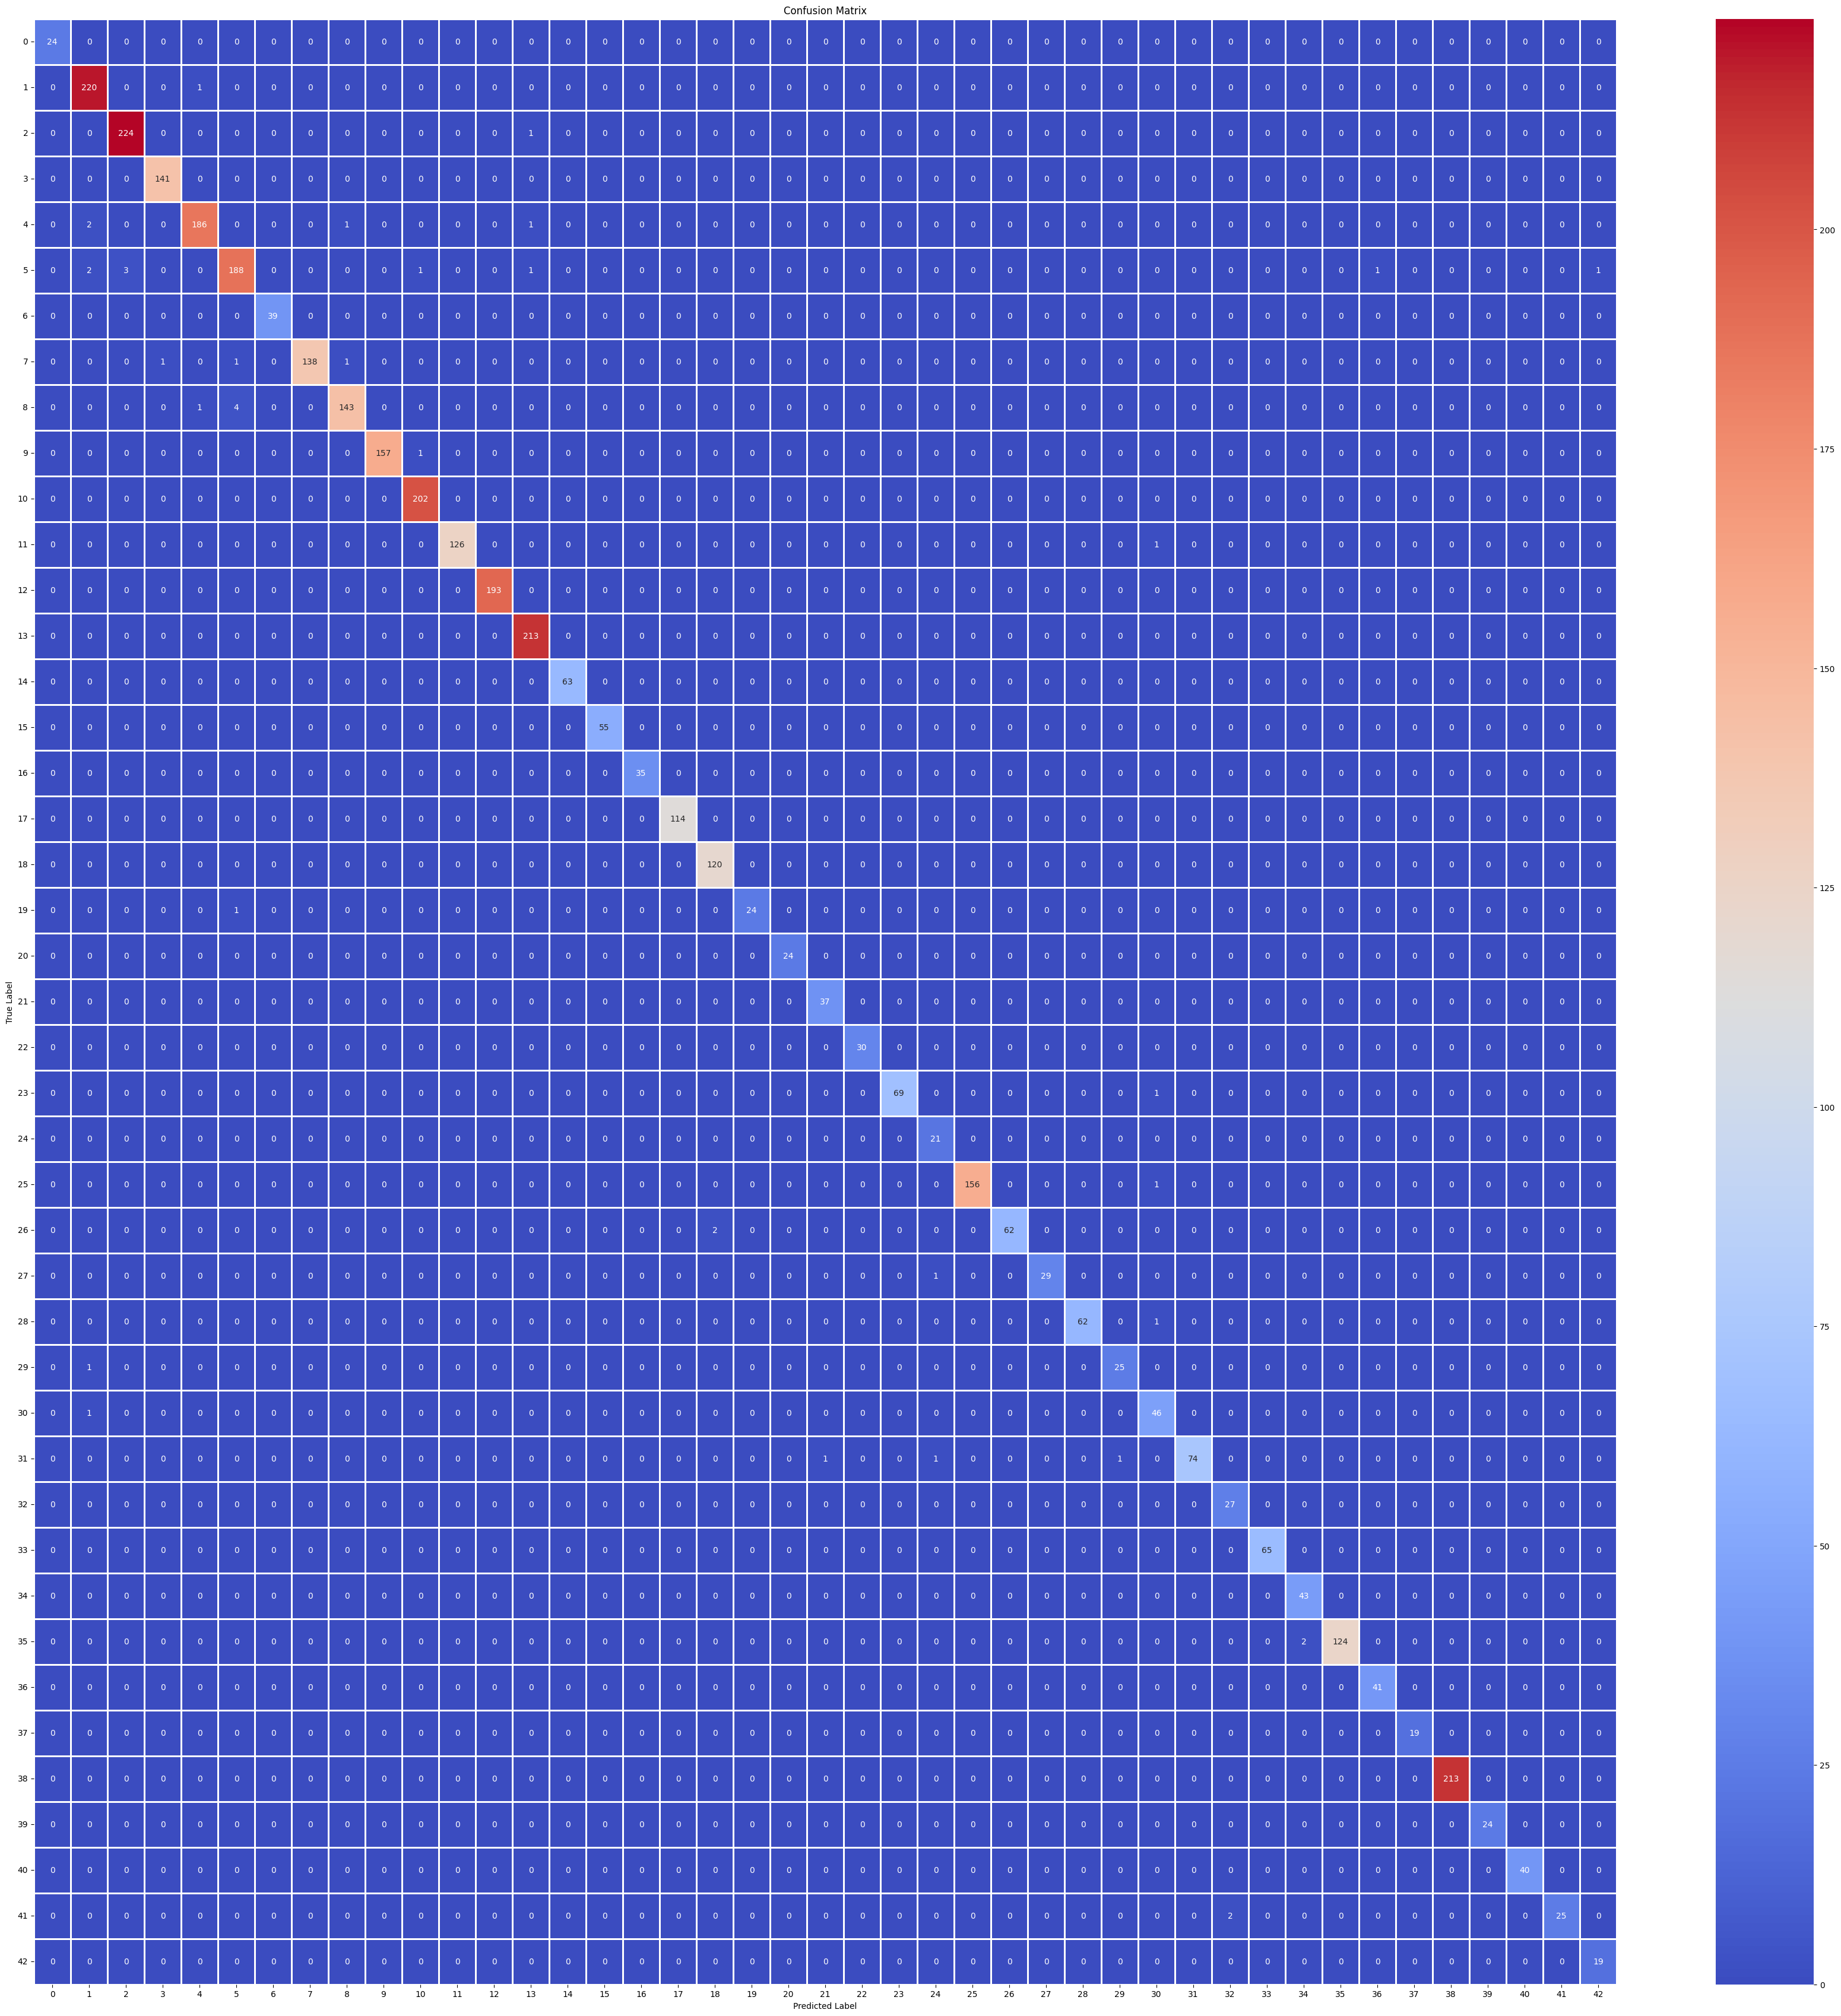

In [ ]:
compute_and_show_confusion_matrix(y_test, y_pred)

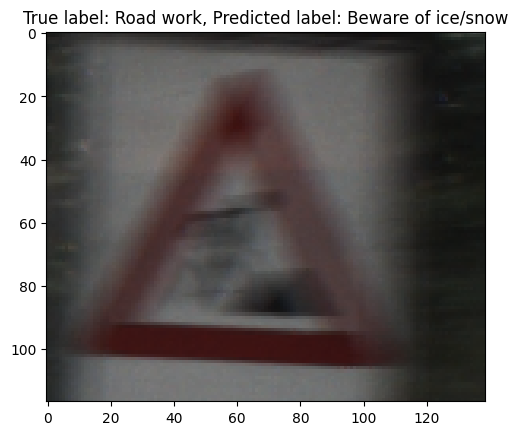

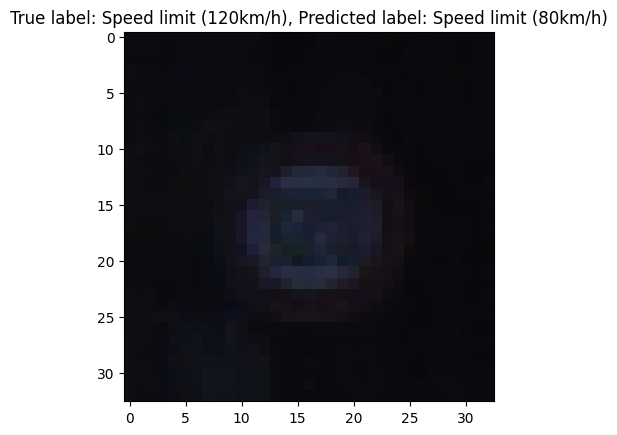

In [ ]:
plot_2_misclassified_objects(y_pred, y_test, X_test)

In [ ]:

def define_mobilenetv2_model():
    # Load MobileNetV2 model
    base_model = MobileNetV2(include_top=False, input_shape=(median_height, median_width, 3))

    # Add custom classifier layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    predictions = layers.Dense(43, activation='softmax')(x)

    # Create the full model
    full_model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the base model layers
    # Compile the model

    full_model.summary()
    full_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return full_model

mobilenet_model = define_mobilenetv2_model()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 16, 16, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 16, 16, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 16, 16, 32)           0         ['bn_Conv1[0][0]']      

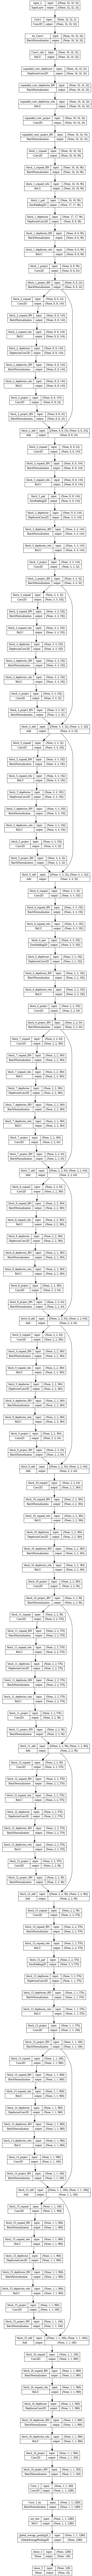

In [ ]:

plot_model(mobilenet_model, show_shapes=True, show_layer_names=True)

In [ ]:

visualkeras.layered_view(mobilenet_model, legend=True).show()

In [ ]:
epochs = 30
hist_cnn = mobilenet_model.fit(ds_train, epochs=epochs, validation_data=ds_val)

Epoch 1/30
883/883 [==============================] - 52s 32ms/step - loss: 1.5272 - accuracy: 0.5585 - val_loss: 4.7049 - val_accuracy: 0.2726
Epoch 2/30
883/883 [==============================] - 32s 36ms/step - loss: 0.4855 - accuracy: 0.8568 - val_loss: 2.9798 - val_accuracy: 0.4836
Epoch 3/30
883/883 [==============================] - 29s 32ms/step - loss: 0.2840 - accuracy: 0.9205 - val_loss: 1.4142 - val_accuracy: 0.7104
Epoch 4/30
883/883 [==============================] - 27s 31ms/step - loss: 0.2220 - accuracy: 0.9381 - val_loss: 0.5475 - val_accuracy: 0.8760
Epoch 5/30
883/883 [==============================] - 28s 32ms/step - loss: 0.1995 - accuracy: 0.9454 - val_loss: 0.6252 - val_accuracy: 0.8534
Epoch 6/30
883/883 [==============================] - 27s 31ms/step - loss: 0.1713 - accuracy: 0.9536 - val_loss: 1.4611 - val_accuracy: 0.7836
Epoch 7/30
883/883 [==============================] - 28s 32ms/step - loss: 0.1389 - accuracy: 0.9632 - val_loss: 0.2788 - val_accuracy:

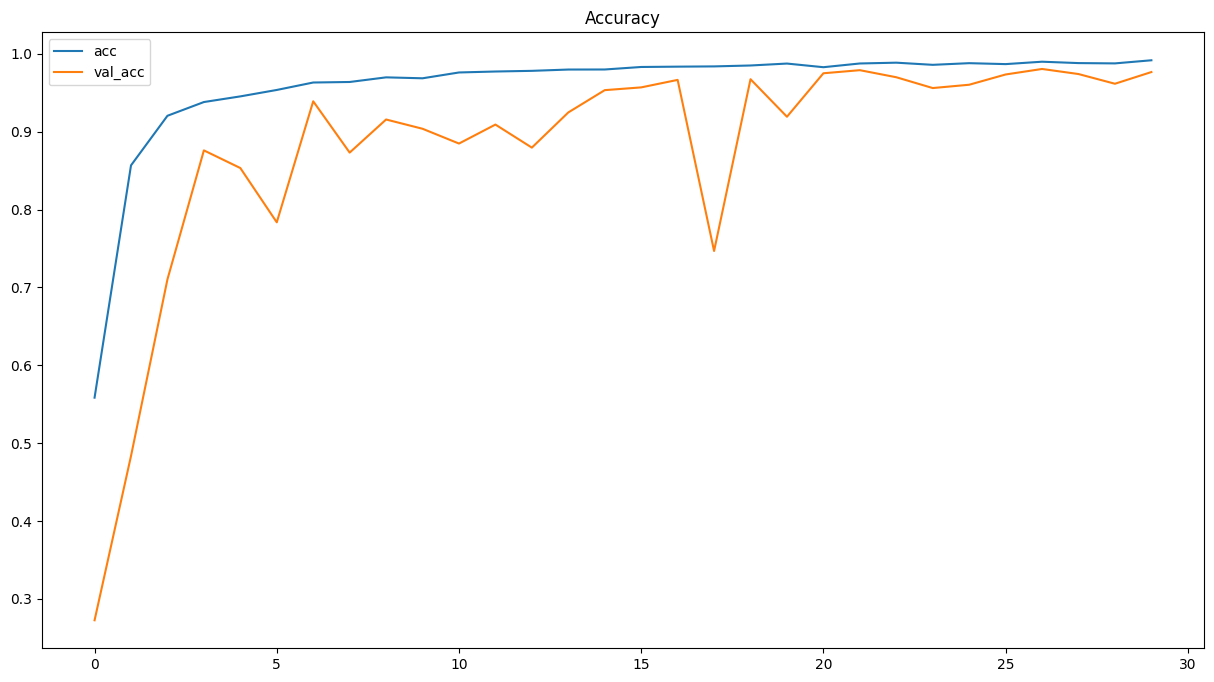

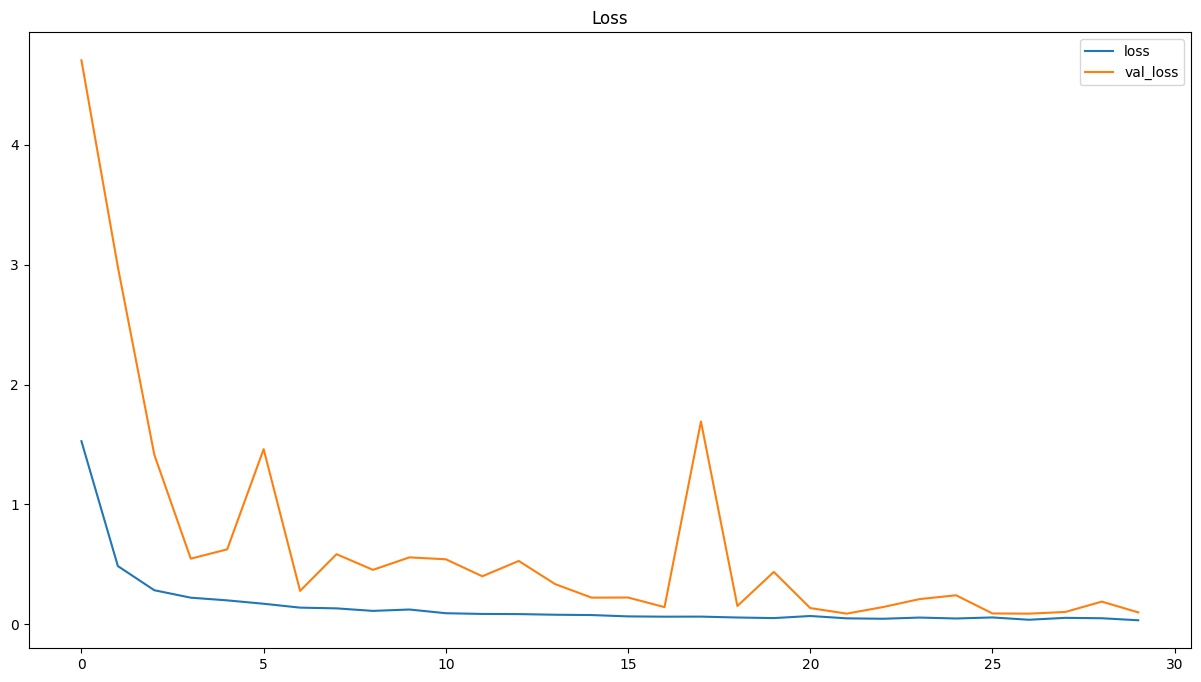

In [ ]:

plot_accuracy_and_loss_model(hist_cnn)

In [ ]:
loss, acc = mobilenet_model.evaluate(ds_test)
print("Accuracy: ",acc)

123/123 [==============================] - 3s 22ms/step - loss: 0.0972 - accuracy: 0.9742
Accuracy:  0.9742412567138672


In [ ]:
probs = mobilenet_model.predict(ds_test)

print(f'{probs.shape}')
y_pred = np.argmax(probs,axis=1)

123/123 [==============================] - 4s 18ms/step
(3921, 43)


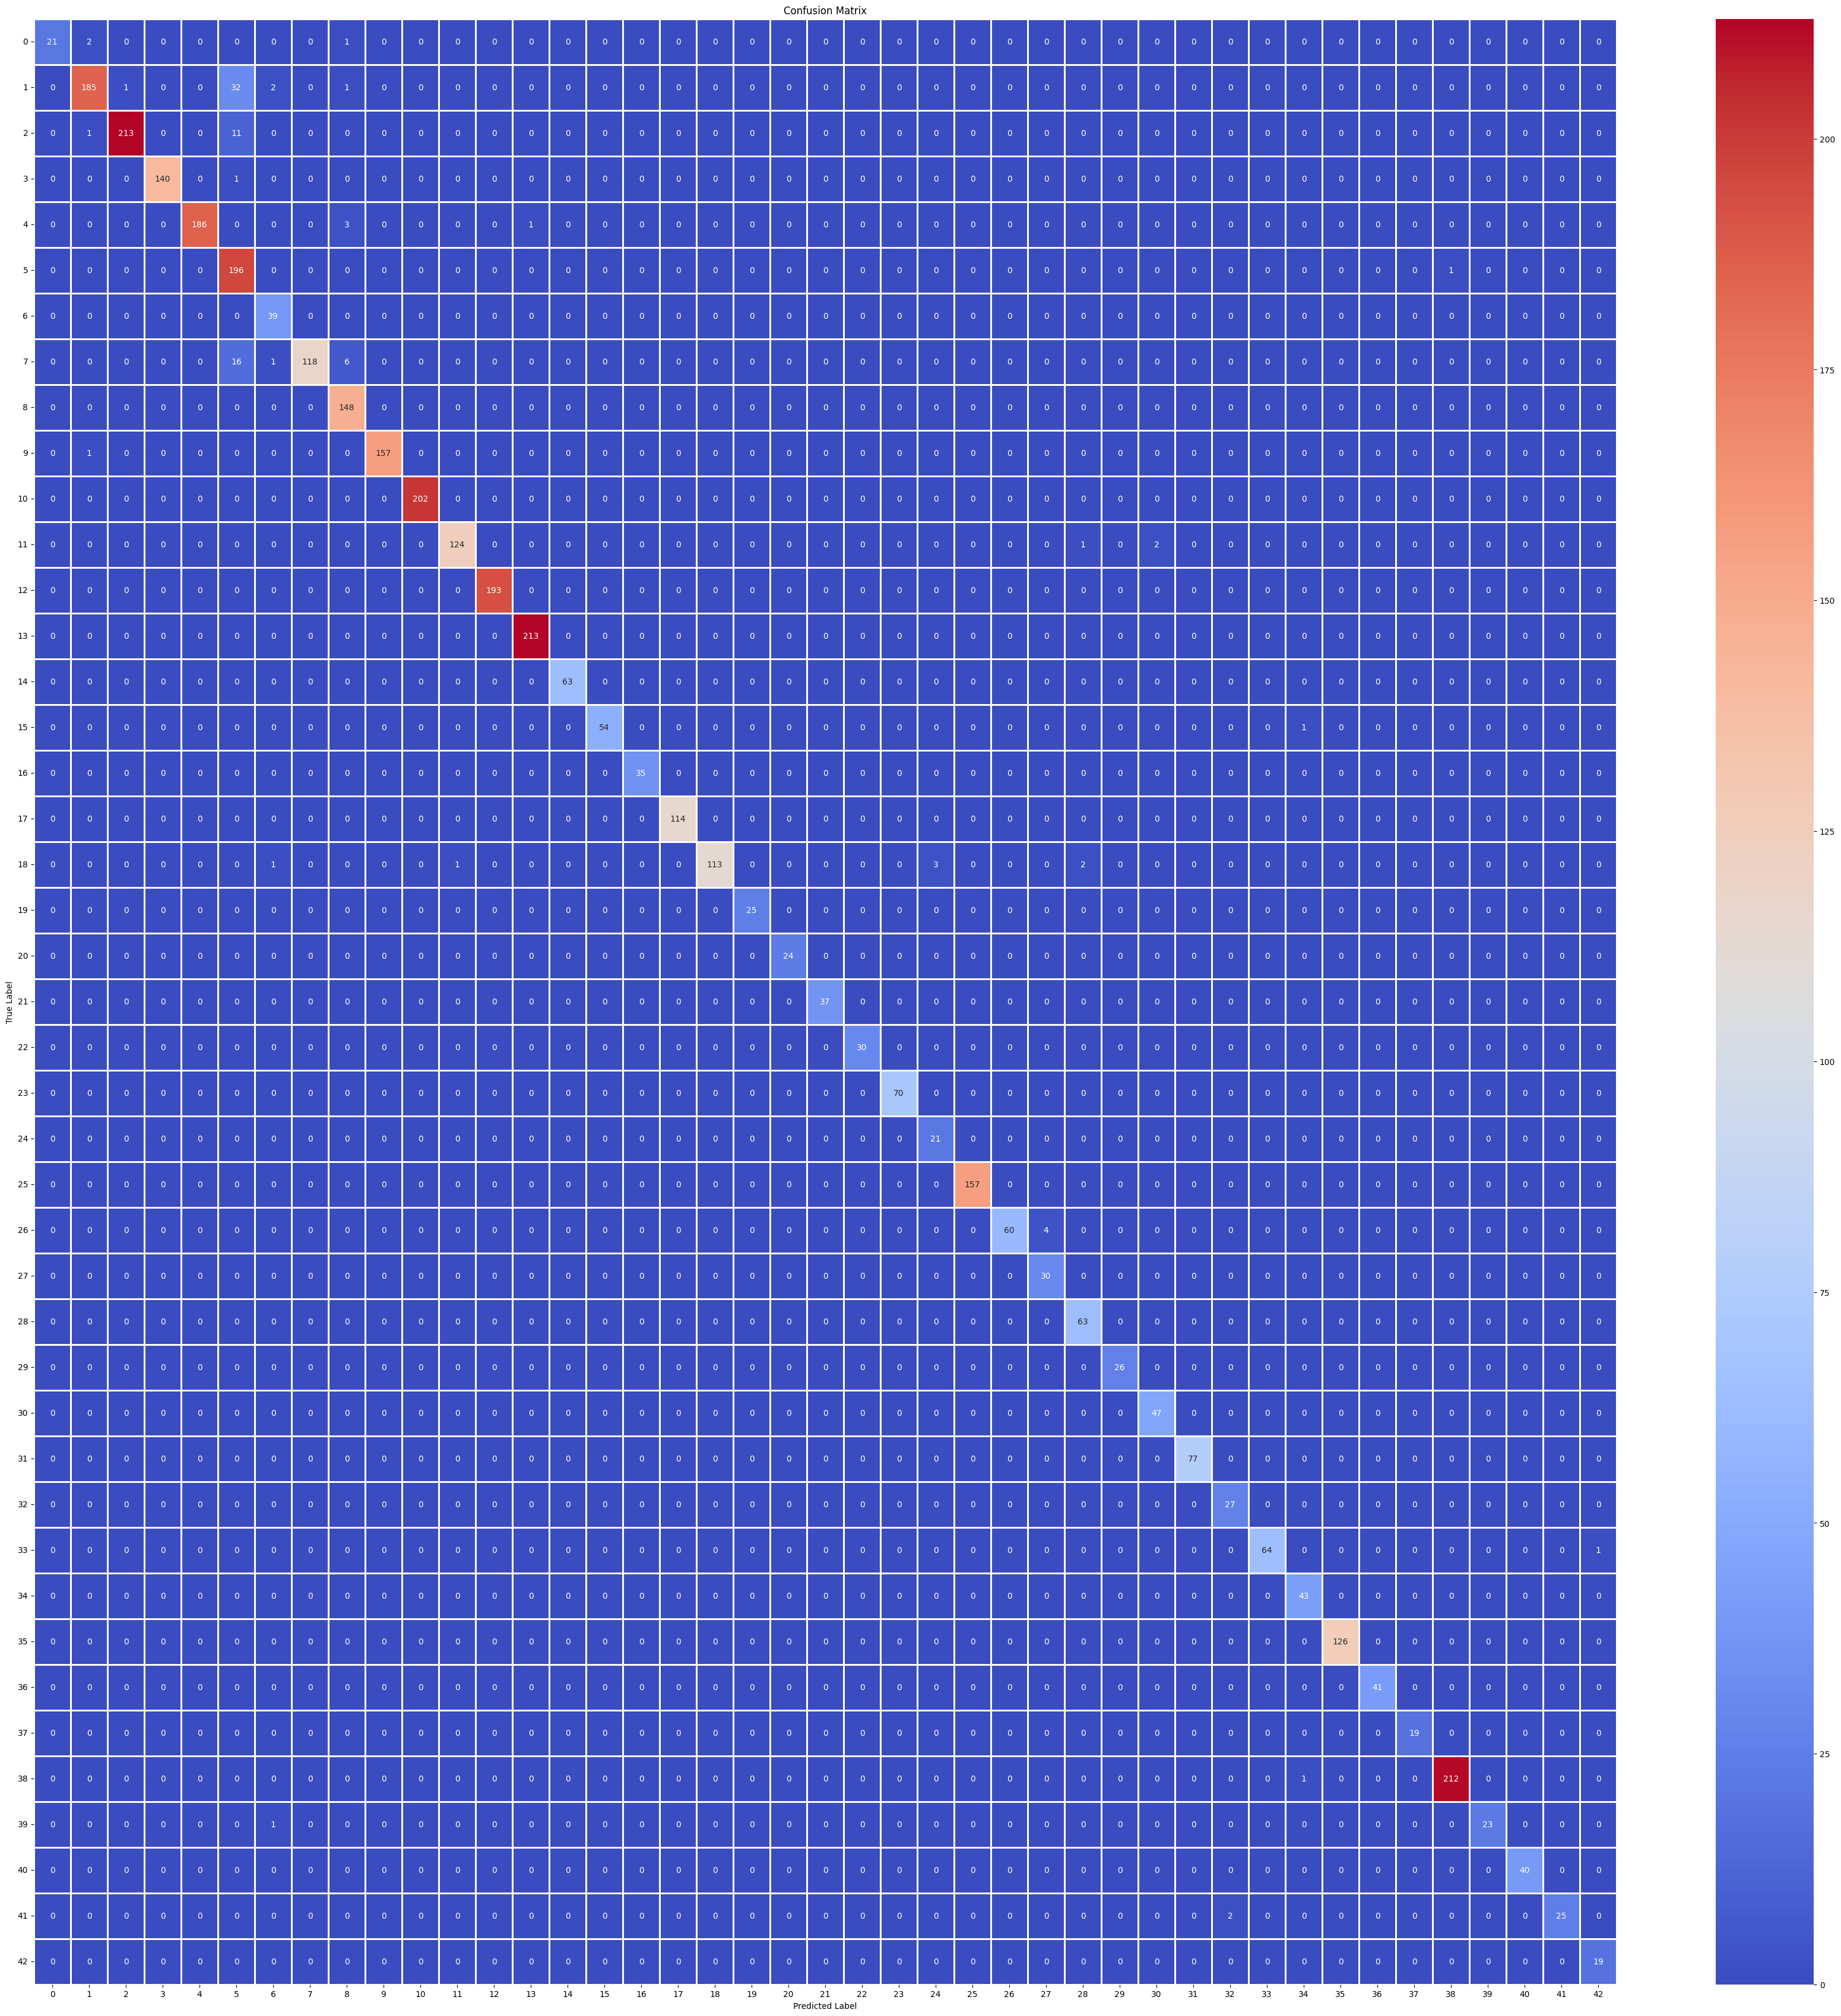

In [ ]:

compute_and_show_confusion_matrix(y_test, y_pred)

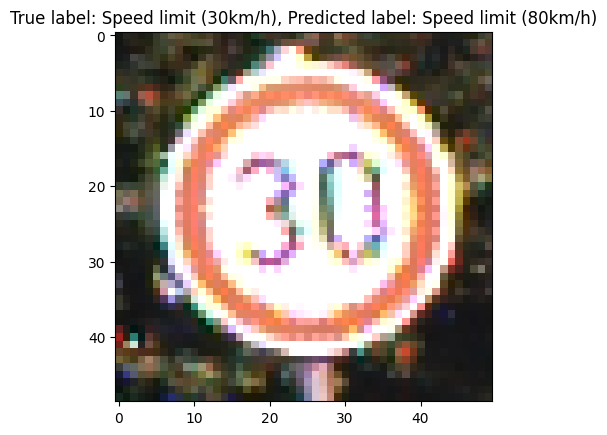

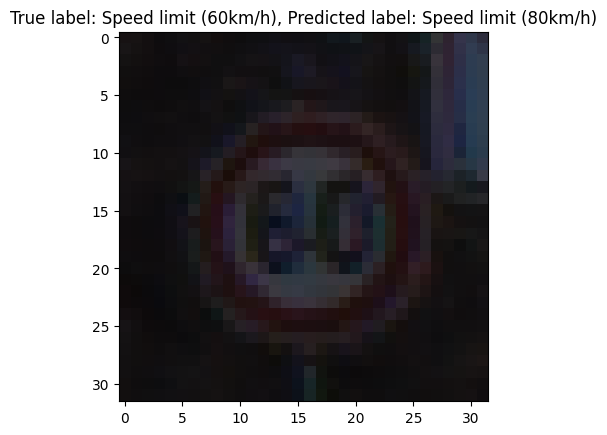

In [ ]:

plot_2_misclassified_objects(y_pred, y_test, X_test)